**Gradient Vanishing & Exploding**

solution

-Change activation function(ex Sigmoid->ReLU)

-Careful initialization

-Small learning rate (Exploding reduction)



*   **Batch Normalization**
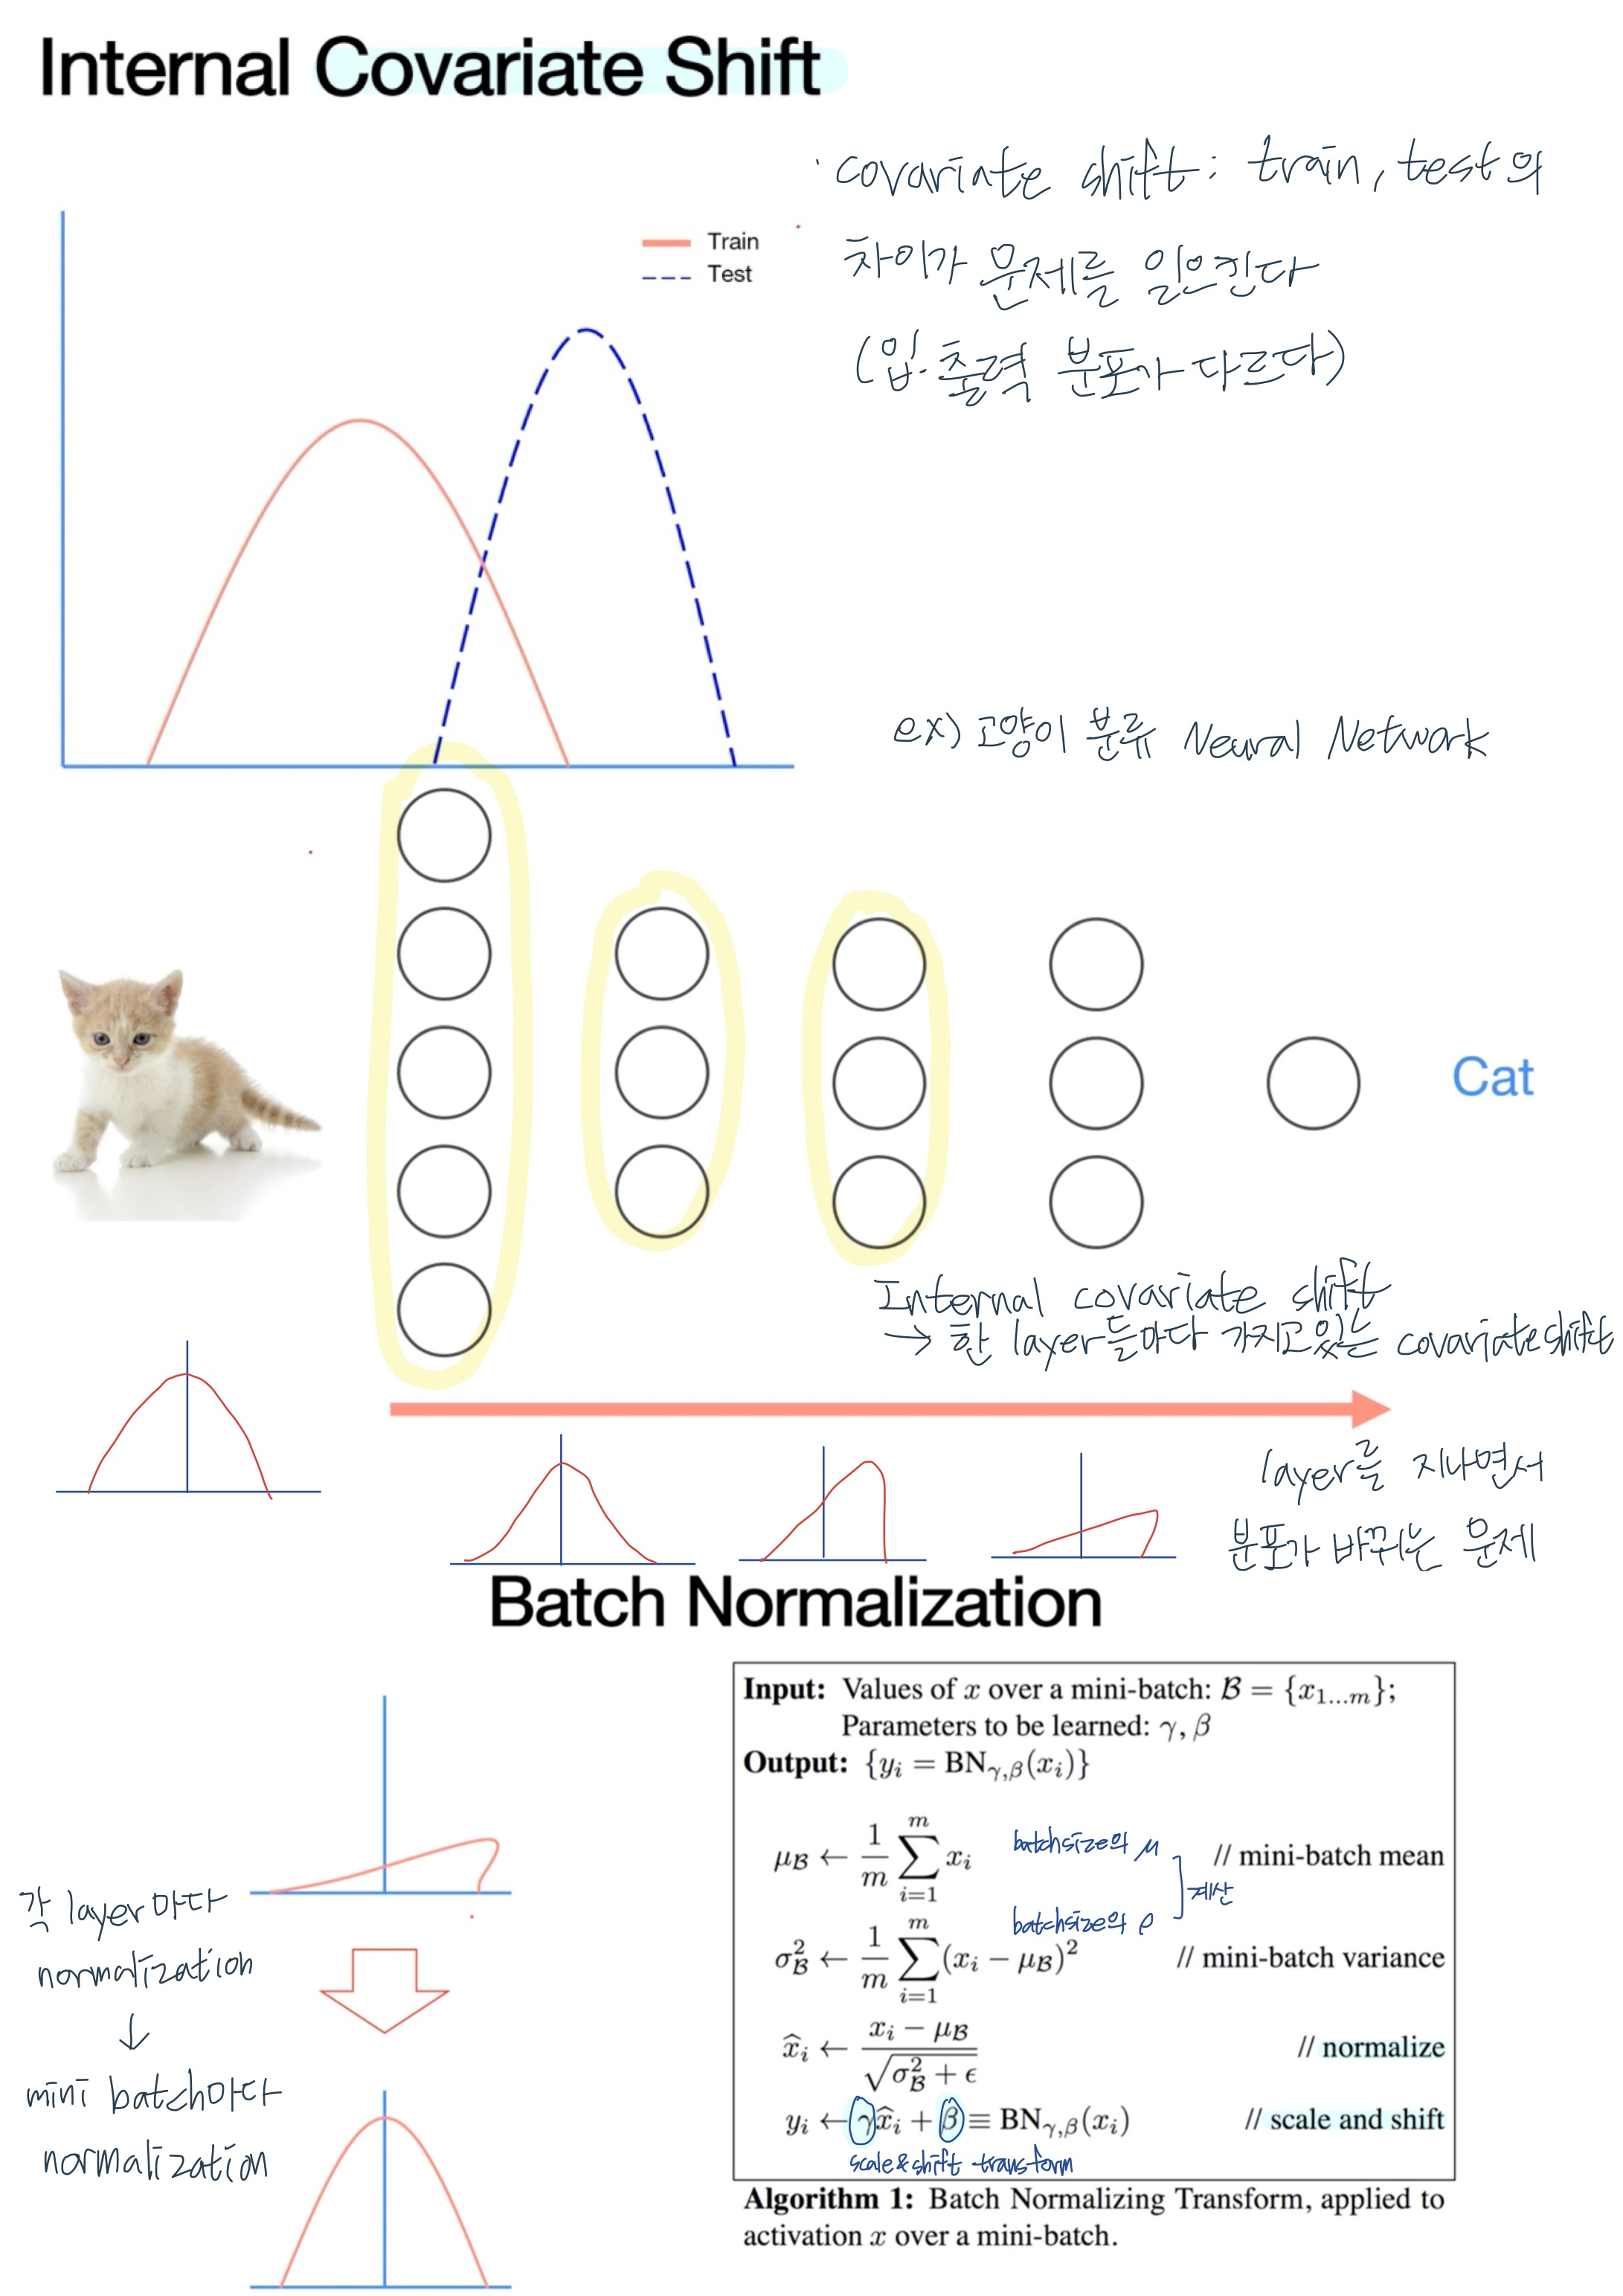

inference 단계에서 batch nomalization사용하기

Code: mnist_batchnorm

In [ ]:
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)
relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 10, bias=True)

bn_model = torch.nn.Sequential(linear1, bn1, relu,
                               linear2, bn1, relu,
                               linear3).to(device)
bn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

for epoch in range(training_epochs):
  bn_model.train()

  for X,Y in train_loader:
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)

    bn_optimizer.zero_grad()
    bn_prediction = bn_model(X)
    bn_loss.backward()
    bn_optimizer.step()

    nn_optimizer.zero_grad()
    nn_prediction = nn_model(X)
    nn_loss = criterion(nn_prediction, Y)
    nn_loss.backward()
    nn_optimizer.step()

batch normalization과 neural network를 따로둔다.